In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession as sess

In [3]:
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))

In [4]:
spark = sess.builder.appName('Dataframe').getOrCreate()

In [5]:
spark

In [6]:
spark.read.option('header', 'true').csv('stocks.csv').show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [7]:
df = spark.read.option('header', 'true').csv('stocks.csv', inferSchema = True)

In [8]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [9]:
filtered_spx = df.filter(df['Close'] < 500)

# Select the required columns
selected_columns = ['Open', 'Close', 'Volume']
filtered_spx = filtered_spx.select(*selected_columns)

# Show the resulting dataframe
filtered_spx.show()


+------------------+------------------+---------+
|              Open|             Close|   Volume|
+------------------+------------------+---------+
|        213.429998|        214.009998|123432400|
|        214.599998|        214.379993|150476200|
|        214.379993|        210.969995|138040000|
|            211.75|            210.58|119282800|
|        210.299994|211.98000499999998|111902700|
|212.79999700000002|210.11000299999998|115557400|
|209.18999499999998|        207.720001|148614900|
|        207.870005|        210.650002|151473000|
|210.11000299999998|            209.43|108223500|
|210.92999500000002|            205.93|148516900|
|        208.330002|        215.039995|182501900|
|        214.910006|            211.73|153038200|
|        212.079994|        208.069996|152038600|
|206.78000600000001|            197.75|220441900|
|202.51000200000001|        203.070002|266424900|
|205.95000100000001|        205.940001|466777500|
|        206.849995|        207.880005|430642100|


In [10]:
filtered_spx2 = df.filter((df['Open'] > 200) & (df['Close'] < 200))

# Select the required columns
selected_columns = ['Open', 'Close', 'Volume']
filtered_spx2 = filtered_spx2.select(*selected_columns)

# Show the resulting dataframe
filtered_spx2.show()


+------------------+----------+---------+
|              Open|     Close|   Volume|
+------------------+----------+---------+
|206.78000600000001|    197.75|220441900|
|        204.930004|199.289995|293375600|
|        201.079996|192.060003|311488100|
+------------------+----------+---------+



In [11]:
# Assuming you already have the 'spx' dataframe loaded

from pyspark.sql.functions import year, col

# Add a new column called 'Year' with the extracted year
df_with_year = df.withColumn('Year', year(col('Date')))

# Show the resulting dataframe with the new 'Year' column
df_with_year.show()


+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|Year|
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|2010|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|2010|
|2010-01-11|212.

In [12]:
from pyspark.sql.functions import min

min_volumes_by_year = df_with_year.groupBy("year").agg(min("volume").alias("minVolume"))
min_volumes_by_year.show()

+----+---------+
|year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, month, max

# Create a Spark session
# Assuming you already have the DataFrame 'df' with the 'year' and 'month' columns
# (as calculated in the previous steps)

# Calculate the highest low price for each year and month
max_low_by_year_month = df.groupBy(year("Date").alias("year"), month("Date").alias("month")).agg(max("Low").alias("maxLow"))

# Show the resulting DataFrame
max_low_by_year_month.show()


+----+-----+------------------+
|year|month|            maxLow|
+----+-----+------------------+
|2012|   10|        665.550026|
|2010|    7|        260.300003|
|2010|   12|        325.099991|
|2015|    2|        131.169998|
|2014|    4|        589.799988|
|2015|   12|        117.809998|
|2016|    7|            103.68|
|2016|   11|        111.400002|
|2012|    8| 673.5400089999999|
|2013|    2|473.24997699999994|
|2012|    4| 626.0000150000001|
|2012|   12|        585.500023|
|2014|   10|        107.209999|
|2016|    5|             99.25|
|2014|   12|        115.290001|
|2013|    9|        503.479988|
|2013|   10|        525.110016|
|2014|    5|        628.900002|
|2016|    2|         96.650002|
|2013|   12| 566.4100269999999|
+----+-----+------------------+
only showing top 20 rows



In [14]:
from pyspark.sql.functions import mean, stddev

# Create a Spark session


# Assuming you already have the DataFrame 'df' with the 'highest' column
# (as calculated in the previous steps)

# Calculate mean and standard deviation for the 'highest' column
result = df.agg(mean("High").alias("mean_high_price"), stddev("High").alias("stddev_high_price"))

# Show the result with two decimal places
result.show(truncate=False)


+-----------------+------------------+
|mean_high_price  |stddev_high_price |
+-----------------+------------------+
|315.9112880164581|186.89817686485767|
+-----------------+------------------+



In [15]:
# main task

from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("SpotifyAnalysis").getOrCreate()

# Read the parquet file into a DataFrame
df = spark.read.parquet("spotify.parquet")

df.printSchema()


root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)



In [16]:
df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+-----------------+--------------------+------------------+------------------+------------------+-----------+--------------+----+------------+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|     acousticness|    instrumentalness|          liveness|           valence|             tempo|duration_ms|time_signature|year|release_date|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+--------

In [17]:
from pyspark.sql.functions import month, dayofmonth

df_with_month_day = df.withColumn("month", month(df["release_date"])).withColumn("day", dayofmonth(df["release_date"]))

# Show the updated DataFrame
df_with_month_day.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+-----------------+--------------------+------------------+------------------+------------------+-----------+--------------+----+------------+-----+---+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|     acousticness|    instrumentalness|          liveness|           valence|             tempo|duration_ms|time_signature|year|release_date|month|day|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------

In [26]:
import matplotlib.pyplot as plt
selected_df = df_with_month_day.select("year", "duration_ms")

# Convert duration from milliseconds to seconds
selected_df = selected_df.withColumn("duration_seconds", selected_df["duration_ms"] / 1000)
filtered_df = selected_df.filter(selected_df["year"] >= 1700)



In [27]:
# Calculate average song duration by year
avg_duration_df = filtered_df.groupBy("year").agg({"duration_seconds": "avg"})

# Show the result
avg_duration_df.show()

+----+---------------------+
|year|avg(duration_seconds)|
+----+---------------------+
|1950|   228.28993167701861|
|1936|    164.6073012048193|
|1951|    193.5646571428572|
|1958|    207.7744397463002|
|1983|    247.3319686393527|
|1972|    263.9221145510839|
|2007|   247.87997692184592|
|1979|   253.36725498575498|
|1988|   262.58333861386166|
|2014|    259.2825934007341|
|1986|    259.6227110377704|
|1908|   226.20347368421054|
|1949|   186.79237931034476|
|1969|   230.62910104250219|
|1930|   209.90483050847462|
|1967|   220.11469432314448|
|1964|   258.59741015089185|
|1956|    239.3593208661417|
|1937|    159.1927000000001|
|2012|   256.85916300877807|
+----+---------------------+
only showing top 20 rows



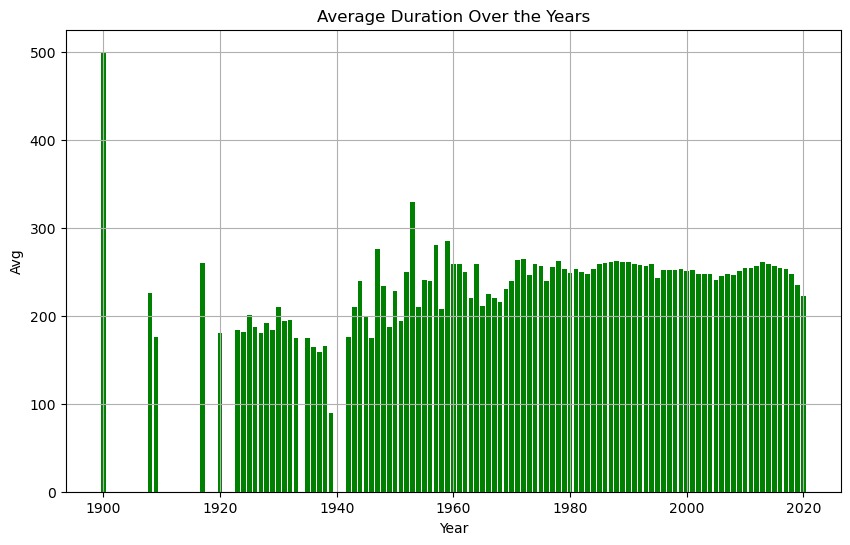

In [74]:
import matplotlib.pyplot as plt

year = avg_duration_df.select("year").collect()
avg = avg_duration_df.select("avg(duration_seconds)").collect()

years = [row["year"] for row in year]
avgs = [row["avg(duration_seconds)"] for row in avg]

plt.figure(figsize=(10, 6))
plt.bar(years, avgs, color="green")
plt.xlabel("Year")
plt.ylabel("Avg")
plt.title("Average Duration Over the Years")
plt.grid(True)
plt.show()

In [36]:
# Find the longest and shortest songs
longest_song = filtered_df.orderBy("duration_seconds", ascending=False).first()
shortest_song = filtered_df.orderBy("duration_seconds").first()

print(f"Longest Song (Year {longest_song['year']}): {longest_song['duration_seconds']} seconds")
print(f"Shortest Song (Year {shortest_song['year']}): {shortest_song['duration_seconds']} seconds")


Longest Song (Year 2018): 6061.09 seconds
Shortest Song (Year 2005): 1.0 seconds


In [49]:
# Count songs per year
songs_per_year_df = filtered_df.groupBy("year").count()

# Show the result
songs_per_year_df.show()


+----+-----+
|year|count|
+----+-----+
|1950|  161|
|1936|   83|
|1951|  175|
|1958|  473|
|1983| 1977|
|1972| 1938|
|2007|56287|
|1979| 2106|
|1988| 4545|
|2014|45005|
|1986| 2727|
|1908|   19|
|1949|  203|
|1969| 1247|
|1930|   59|
|1967|  916|
|1964|  729|
|1956|  508|
|1937|   40|
|2012|45108|
+----+-----+
only showing top 20 rows



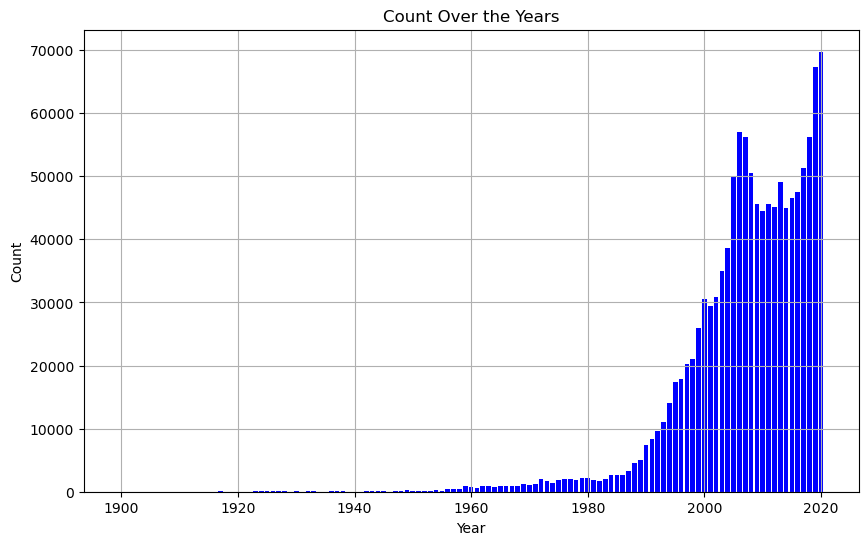

In [60]:
import matplotlib.pyplot as plt

year = songs_per_year_df.select("year").collect()
count = songs_per_year_df.select("count").collect()

years = [row["year"] for row in year]
counts = [row["count"] for row in count]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(years, counts, color="blue")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Count Over the Years")
plt.grid(True)
plt.show()

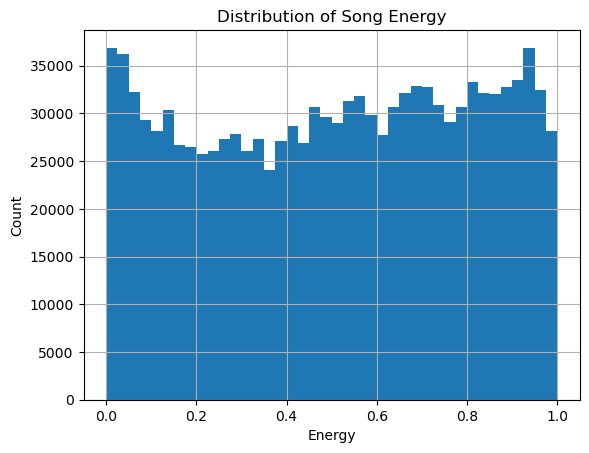

In [67]:
#Distribution of Song Energy:

energy =[row["energy"] for row in df_with_month_day.select("energy").collect()] 
plt.hist(energy, bins = 40)
plt.xlabel("Energy")
plt.ylabel("Count")
plt.title("Distribution of Song Energy")
plt.grid(True)
plt.show()


In [69]:
#Correlation between Energy and Valence:
correlation_df = df_with_month_day.stat.corr("energy", "valence")

print(f"Correlation between energy and valence: {correlation_df:.4f}")


Correlation between energy and valence: 0.3995


In [46]:
filtered_df.show()

+----+-----------+----------------+
|year|duration_ms|duration_seconds|
+----+-----------+----------------+
|1999|     210133|         210.133|
|1999|     206200|           206.2|
|1999|     298893|         298.893|
|1999|     213640|          213.64|
|1999|     205600|           205.6|
|1999|     280960|          280.96|
|1999|     202040|          202.04|
|1999|     228093|         228.093|
|1999|     151573|         151.573|
|1999|     224933|         224.933|
|1999|     277267|         277.267|
|1999|     216427|         216.427|
|1992|     243760|          243.76|
|1992|     313667|         313.667|
|1992|     335840|          335.84|
|1992|     287333|         287.333|
|1992|     307067|         307.067|
|1992|     294693|         294.693|
|1992|     364133|         364.133|
|1992|     331107|         331.107|
+----+-----------+----------------+
only showing top 20 rows

